In [ ]:
# Install libraries
!pip install scikit-learn

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import requests
import seaborn as sea

## 1. CRV Transactions

/Users/rodolfo/.pyenv/versions/3.9.6/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Figure size 640x480 with 0 Axes>

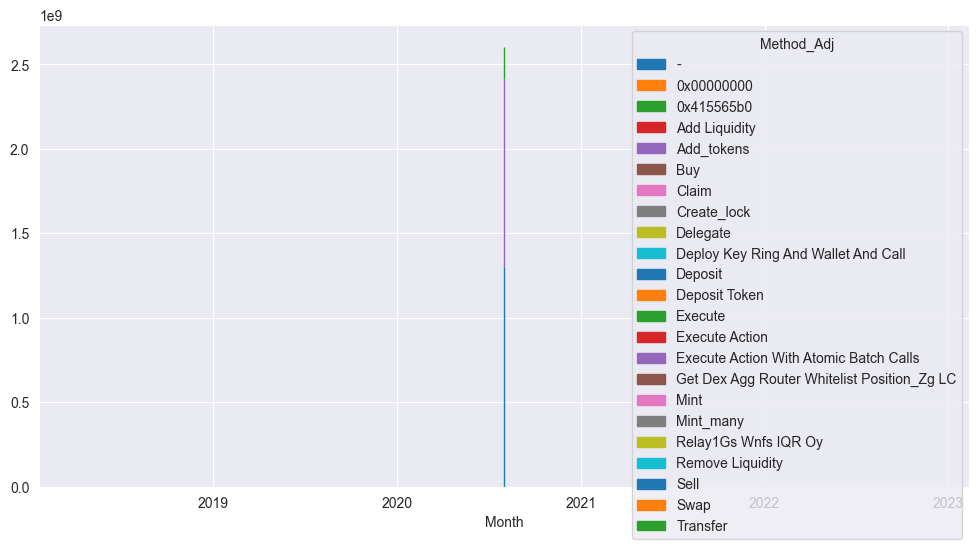

In [106]:
#LOoading and preparing the dataset
df = pd.read_csv("CRV%20Txns.csv")
df = df[['DateTime (UTC)', 'Quantity', 'Method']]
#Coverting data types
df['Quantity'] = df['Quantity'].str.replace(",","").astype('float')
df['DateTime (UTC)'] = pd.to_datetime(df['DateTime (UTC)'])
df['Month'] = df['DateTime (UTC)'].dt.to_period('M')


# Feature engineering: reducing the number of categories
df['Method_Adj'] = df['Method']
df.loc[df['Method'].str.contains('Swap', case=False, na=False), 'Method_Adj'] = 'Swap'
df.loc[df['Method'].str.contains('Remove Liquidity', case=False, na=False), 'Method_Adj'] = 'Remove Liquidity'
df.loc[df['Method'].str.contains('Transfer', case=False, na=False), 'Method_Adj'] = 'Transfer'
df.loc[df['Method'].str.contains('Add Liquidity', case=False, na=False), 'Method_Adj'] = 'Add Liquidity'

#Grouping dataset by Method and Month and calculating quantity cumulative across method over time
df_cum = df.groupby(["Month", "Method_Adj"]).agg({'Quantity': np.sum}).reset_index()

#plotting
plt.figure()
sea.set_style('darkgrid', {'axes.grid': True})
df_plot = df_cum.pivot(index = 'Month', columns = 'Method_Adj', values = 'Quantity' )
df_plot.plot(kind = 'area', stacked= 'True')

#Setting
plt.gcf().set_dpi(100)
plt.gcf().set_size_inches(12,6)


<Figure size 640x480 with 0 Axes>

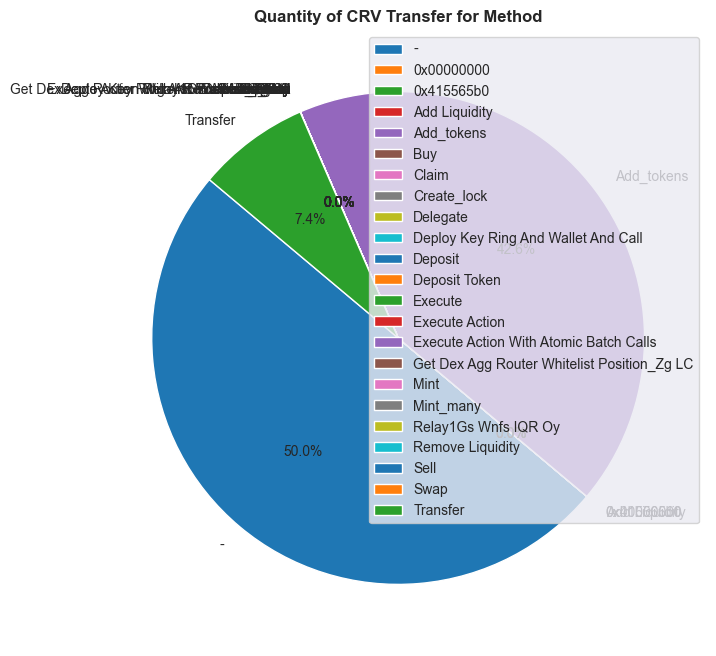

In [110]:
#Pie Chart
plt.figure()
sea.set_style('darkgrid', {'axes.grid': True})
plt.figure(figsize=(12, 8))

plt.pie(df_cum['Quantity'], labels=df_cum['Method_Adj'], autopct='%1.1f%%', startangle=140)
plt.title('Quantity of CRV Transfer for Method', fontsize = 12, fontweight = 'bold')

#setting
plt.gcf().set_size_inches(11,8)
plt.gcf().set_dpi(100)
plt.legend()


In [114]:
df_cum.groupby(['Method_Adj']).agg({'Quantity': 'sum'})

,Quantity
Method_Adj,
-,1.303040e+09
0x00000000,5.577086e+02
0x415565b0,1.646435e+02
Add Liquidity,1.166246e+03
Add_tokens,1.110832e+09
Buy,7.311025e-02
Claim,1.732666e+04
Create_lock,7.584611e+02
Delegate,3.105449e+03


## 2. veCRV Holders

/var/folders/r4/xg6xh1n11qqdk9l26twbw4zm0000gn/T/ipykernel_30608/1912920802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holders['Balance'] = df['Balance'].str.replace(",","").astype('float')


<Figure size 640x480 with 0 Axes>

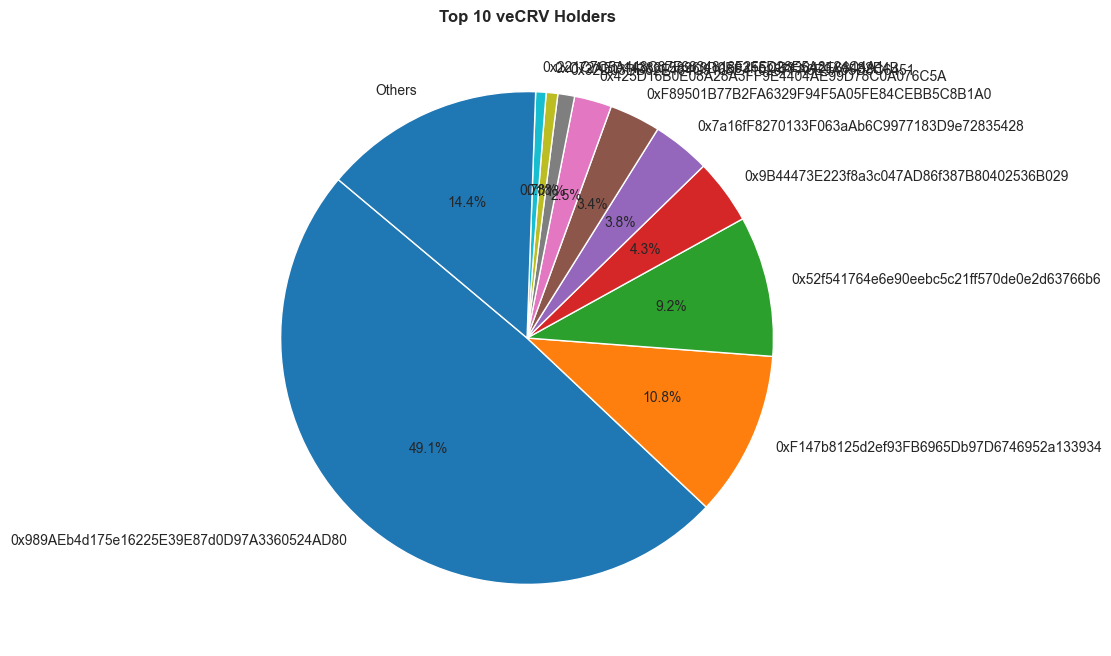

In [4]:
#loading
df = pd.read_csv("veCRV%20holders.csv")
df_holders = df[['HolderAddress','Balance']]
df_holders['Balance'] = df['Balance'].str.replace(",","").astype('float')

#prepating
top_10 = df_holders.nlargest(10, 'Balance')
others_total = df_holders['Balance'].sum() - top_10['Balance'].sum()
top_10.loc[10] = ["Others", others_total]

# Plot
plt.figure()
sea.set_style('darkgrid', {'axes.grid': True})
plt.figure(figsize=(12, 8))
plt.pie(top_10['Balance'], labels=top_10['HolderAddress'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 veCRV Holders', fontsize = 12, fontweight = 'bold')

#setting
plt.gcf().set_size_inches(11,8)
plt.gcf().set_dpi(100)


In [5]:
top_10

,HolderAddress,Balance
0,0x989AEb4d175e16225E39E87d0D97A3360524AD80,3.140883e+08
1,0xF147b8125d2ef93FB6965Db97D6746952a133934,6.941441e+07
2,0x52f541764e6e90eebc5c21ff570de0e2d63766b6,5.904352e+07
3,0x9B44473E223f8a3c047AD86f387B80402536B029,2.724568e+07
4,0x7a16fF8270133F063aAb6C9977183D9e72835428,2.435905e+07
5,0xF89501B77B2FA6329F94F5A05FE84CEBB5C8B1A0,2.146165e+07
6,0x425D16B0E08A28A3FF9E4404AE99D78C0A076C5A,1.569159e+07
7,0x32D03DB62E464C9168E41028FFA6E9A05D8C6451,7.003762e+06
8,0xC72AED14386158960D0E93FECB83642E68482E4B,4.884680e+06
9,0x221C7C5A448C87F6834818F255D28E5A8124C4A1,4.364082e+06


## 3. Trading Volume vs Correlation

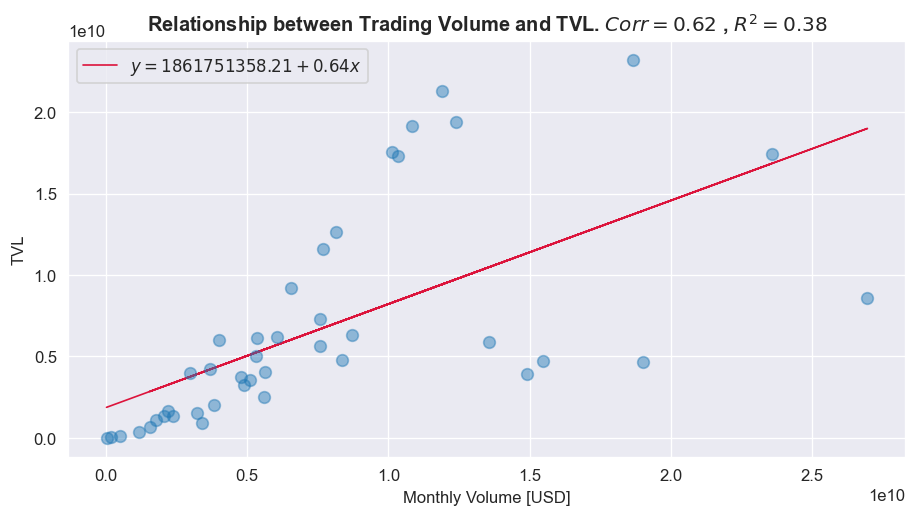

In [6]:
#Extract data prepared from Flipside
url = 'https://flipsidecrypto.xyz/api/v1/queries/20bd028e-d3da-4d62-bf41-b707837cf0d8/data/latest'
response = requests.get(url)
data = response.json()
df_corr= pd.DataFrame(data)

#Linear regression and correlation
X = df_corr['VOL_USD'].to_numpy()
Y = df_corr['TVL'].to_numpy()
linear_coef = np.polyfit(y = Y, x = X ,deg = 1)
a1,a0 = linear_coef
F = a0 + a1 *X # regression function
corr= df_corr['VOL_USD'].corr(df_corr['TVL'], method = "pearson")

# R2 - Represents the sum of squares of the residual errors of the data model.
corr_matrix = np.corrcoef(Y,F)
R_sq = corr_matrix[0,1] **2
R_sq

#Visualization
plt.figure()
sea.set_style('darkgrid', {'axis.grid': True})
plt.plot(X,F,'-', linewidth = 1, c= 'crimson', label = '$y = {} + {}x$'.format(round(a0,2),round(a1,2)))
plt.plot(X,Y,'o',linewidth = 2.4, markersize = 7, alpha = 0.45)

#labels and setting
plt.xlabel('Monthly Volume [USD]')
plt.ylabel('TVL')
plt.title(f"Relationship between Trading Volume and TVL. $Corr = {round(corr,2)}$ , $R^2 ={round(R_sq,2)}$", fontweight = 'bold')
plt.legend(loc = 'best', shadow = False, frameon = True, framealpha = 0.8)
plt.gcf().set_dpi(120)
plt.gcf().set_size_inches(9,4.5)

In [7]:
corr_matrix = np.corrcoef(Y,F)
R_sq = corr_matrix[0,1] **2
R_sq

0.3784902334024622

## 4. Forecastig Trading Volume of 3pool

In [16]:
#Extract data prepared from Flipside
url = 'https://flipsidecrypto.xyz/api/v1/queries/699c3cf7-e9bd-4b8d-9b74-124a577c6912/data/latest'
response = requests.get(url)
data = response.json()
df_pool= pd.DataFrame(data)
df_pool.head()
#df_pool.to_csv('3pool_data.csv')

,MONTH,VOL_USD,TVL,FED_RATE
0,2020-09-01,4.560508e+08,2.838860e+08,0.09
1,2020-10-01,7.085345e+08,1.819190e+08,0.09
2,2020-11-01,7.908409e+08,3.194033e+08,0.09
3,2020-12-01,8.204292e+08,2.059953e+08,0.09
4,2021-01-01,2.691111e+09,5.294053e+08,0.09


In [17]:
# linear correlation
df_pool.corr().round(2)

/var/folders/r4/xg6xh1n11qqdk9l26twbw4zm0000gn/T/ipykernel_30608/3002175243.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pool.corr().round(2)


,VOL_USD,TVL,FED_RATE
VOL_USD,1.00,-0.13,0.19
TVL,-0.13,1.00,-0.53
FED_RATE,0.19,-0.53,1.00


In [70]:

# Feature Engineering for Market Condition Scenarios
# Steady Market Condition - Use the existing FED_RATE

# Pessimistic Market Condition - Increase FED_RATE by 15%
coef = 0.15
df_pool['FED_RATE_PESSIMISTIC'] = df_pool['FED_RATE'] * ( 1 + coef)

# Optimistic Market Condition - Decrease FED_RATE by 20%
df_pool['FED_RATE_OPTIMISTIC'] = df_pool['FED_RATE'] * (1 - coef)
df_pool['FED_RATE_OPTIMISTIC'] = df_pool['FED_RATE_OPTIMISTIC'].clip(lower=0)

# Preparing data for model training and testing
df_pool = df_pool.sort_values(by='MONTH')

# Splitting the data into train and test datasets
train_data = df_pool[:-10]  # First 32 months for training
test_data = df_pool[-10:]   # Last 10 months for testing

# Preparing features and target variable
X_train = train_data[['TVL', 'FED_RATE', 'FED_RATE_PESSIMISTIC', 'FED_RATE_OPTIMISTIC']]
y_train = train_data['VOL_USD']

X_test = test_data[['TVL', 'FED_RATE', 'FED_RATE_PESSIMISTIC', 'FED_RATE_OPTIMISTIC']]
y_test = test_data['VOL_USD']

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Evaluation metrics
mae, mse, rmse


(1651739209.9135613, 7.949102300457301e+18, 2819415240.871288)

In [68]:
#Forecast for the most recent month
current_month = df_pool.iloc[-1]

# Adjusting the input for each scenario
input_steady = current_month[['TVL', 'FED_RATE', 'FED_RATE', 'FED_RATE']].values
input_pessimistic = current_month[['TVL', 'FED_RATE_PESSIMISTIC', 'FED_RATE_PESSIMISTIC', 'FED_RATE_PESSIMISTIC']].values
input_optimistic = current_month[['TVL', 'FED_RATE_OPTIMISTIC', 'FED_RATE_OPTIMISTIC', 'FED_RATE_OPTIMISTIC']].values

# Making predictions for each scenario
steady_prediction = model.predict([input_steady])[0]
pessimistic_prediction = model.predict([input_pessimistic])[0]
optimistic_prediction = model.predict([input_optimistic])[0]

steady_prediction, pessimistic_prediction, optimistic_prediction

/Users/rodolfo/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/rodolfo/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/rodolfo/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


(2282212902.8525286, 2282212902.8525286, 4329962954.932472)

/Users/rodolfo/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/rodolfo/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/rodolfo/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


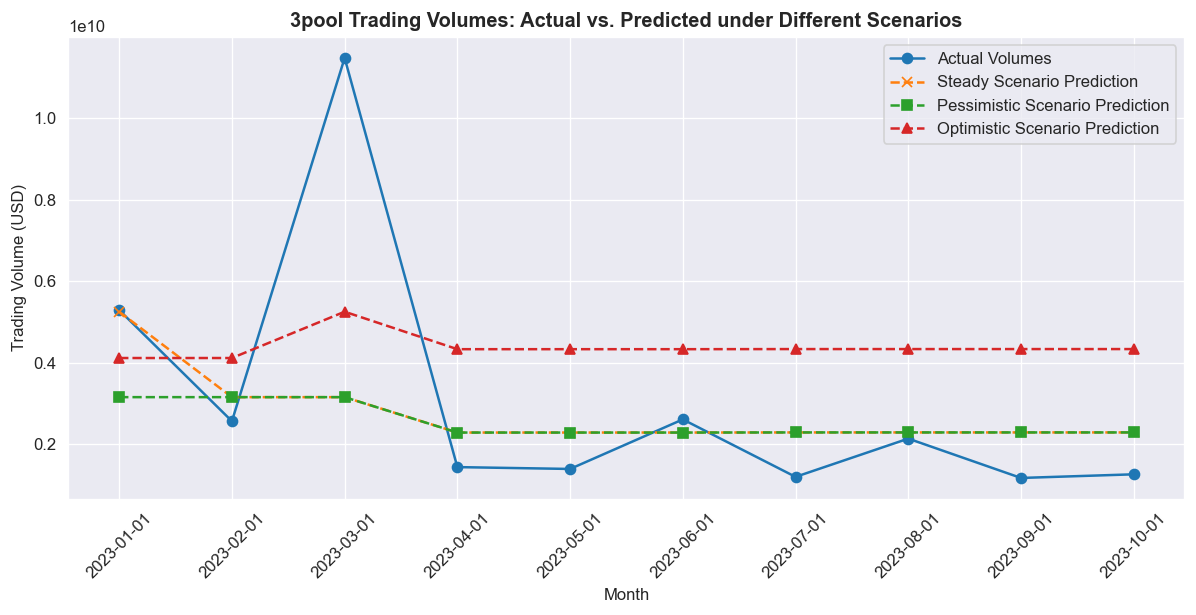

In [69]:


# data for the last 10 mmonths
actual_volumes = test_data['VOL_USD']
dates = test_data['MONTH']

# Recalculating the predictions for the last 10 months under each scenario
X_test_steady = test_data[['TVL', 'FED_RATE', 'FED_RATE', 'FED_RATE']].values
predictions_steady = model.predict(X_test_steady)

X_test_pessimistic = test_data[['TVL', 'FED_RATE_PESSIMISTIC', 'FED_RATE_PESSIMISTIC', 'FED_RATE_PESSIMISTIC']].values
predictions_pessimistic = model.predict(X_test_pessimistic)

X_test_optimistic = test_data[['TVL', 'FED_RATE_OPTIMISTIC', 'FED_RATE_OPTIMISTIC', 'FED_RATE_OPTIMISTIC']].values
predictions_optimistic = model.predict(X_test_optimistic)

# Plotting 
plt.figure()
sea.set_style('darkgrid', {'axis.grid': True})
plt.plot(dates, actual_volumes, label='Actual Volumes', marker='o')
plt.plot(dates, predictions_steady, label='Steady Scenario Prediction', linestyle='--', marker='x')
plt.plot(dates, predictions_pessimistic, label='Pessimistic Scenario Prediction', linestyle='--', marker='s')
plt.plot(dates, predictions_optimistic, label='Optimistic Scenario Prediction', linestyle='--', marker='^')

#Setting
plt.title('3pool Trading Volumes: Actual vs. Predicted under Different Scenarios', fontweight = 'bold')
plt.xlabel('Month')
plt.ylabel('Trading Volume (USD)')
plt.xticks(rotation=45)
plt.legend(loc = 'best', shadow = False, frameon = True, framealpha = 0.8)
plt.gcf().set_dpi(120)
plt.gcf().set_size_inches(12,5)
